In [1]:
%matplotlib inline

import gym
import matplotlib
import numpy as np
import sys

from collections import defaultdict

if "../" not in sys.path:
  sys.path.append("../") 
from lib.envs.blackjack import BlackjackEnv
from lib import plotting

matplotlib.style.use('ggplot')

In [2]:
env = BlackjackEnv()

In [52]:
def mc_prediction(policy, env, num_episodes, discount_factor=1.0):
    """
    Monte Carlo prediction algorithm. Calculates the value function
    for a given policy using sampling.
    
    Args:
        policy: A function that maps an observation to action probabilities.
        env: OpenAI gym environment.
        num_episodes: Nubmer of episodes to sample.
        discount_factor: Lambda discount factor.
    
    Returns:
        A dictionary that maps from state -> value.
        The state is a tuple and the value is a float.
    """

    # Keeps track of sum and count of returns for each state
    # to calculate an average. We could use an array to save all
    # returns (like in the book) but that's memory inefficient.
    returns_sum = defaultdict(float)
    returns_count = defaultdict(float)
    
    # The final value function
    V = defaultdict(float)
    for _i in range(num_episodes):
        
        if _i % 5000 == 0:
            print('Episode Number {}\n'.format(_i))
        done = False
        episode = list()
        observation = env.reset()
        while not done:
            action = policy(observation)
            new_observation, reward, done, _ = env.step(action)
            episode.append((observation, action, reward))
            observation = new_observation
        states = set([tuple(x[0]) for x in episode])
        for state in states:
            start = False
            returns_count[state] += 1
            for step in episode:
                if step[0] == state:
                    if not start:
                        count = 0
                    start = True
                if start:
                    count+= 1
                    returns_sum[state] += step[2]*(discount_factor**count)
            V[state] = returns_sum[state]/returns_count[state]
    # Implement this!
    return V    

In [53]:
def sample_policy(observation):
    """
    A policy that sticks if the player score is > 20 and hits otherwise.
    """
    score, dealer_score, usable_ace = observation
    return 0 if score >= 20 else 1

Episode Number 0

Episode Number 5000



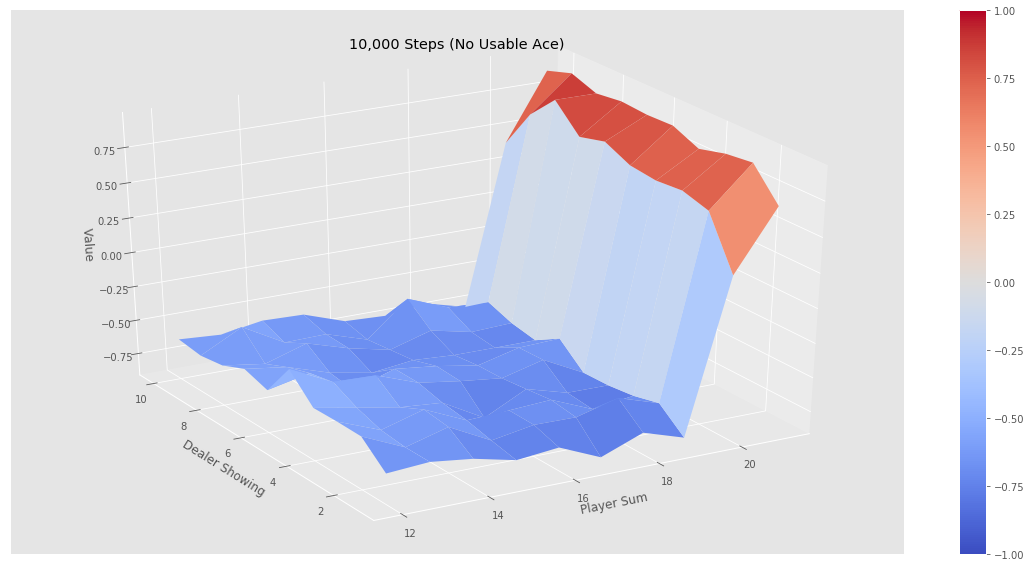

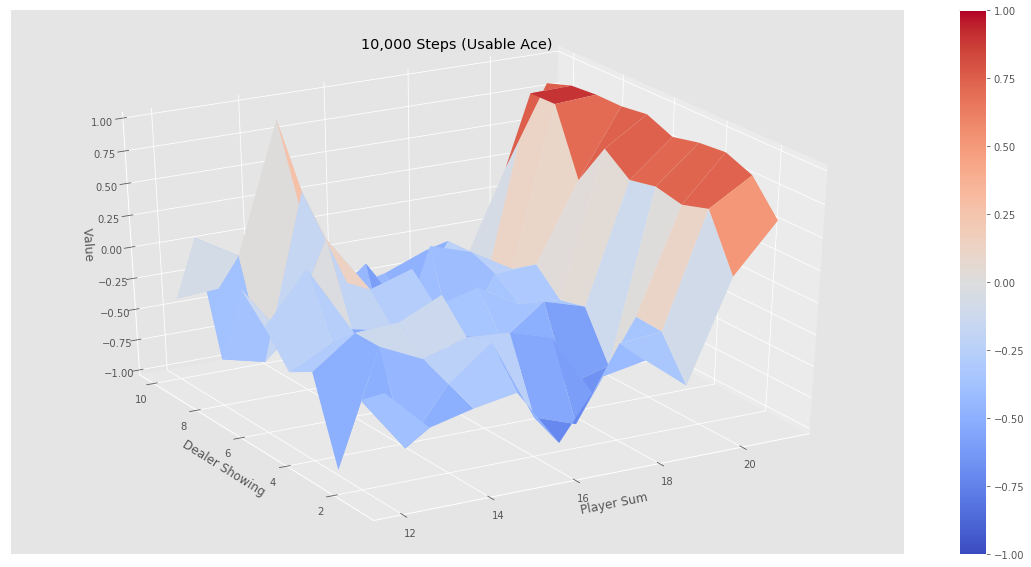

Episode Number 0

Episode Number 5000

Episode Number 10000

Episode Number 15000

Episode Number 20000

Episode Number 25000

Episode Number 30000

Episode Number 35000

Episode Number 40000

Episode Number 45000

Episode Number 50000

Episode Number 55000

Episode Number 60000

Episode Number 65000

Episode Number 70000

Episode Number 75000

Episode Number 80000

Episode Number 85000

Episode Number 90000

Episode Number 95000

Episode Number 100000

Episode Number 105000

Episode Number 110000

Episode Number 115000

Episode Number 120000

Episode Number 125000

Episode Number 130000

Episode Number 135000

Episode Number 140000

Episode Number 145000

Episode Number 150000

Episode Number 155000

Episode Number 160000

Episode Number 165000

Episode Number 170000

Episode Number 175000

Episode Number 180000

Episode Number 185000

Episode Number 190000

Episode Number 195000

Episode Number 200000

Episode Number 205000

Episode Number 210000

Episode Number 215000

Episode Numbe

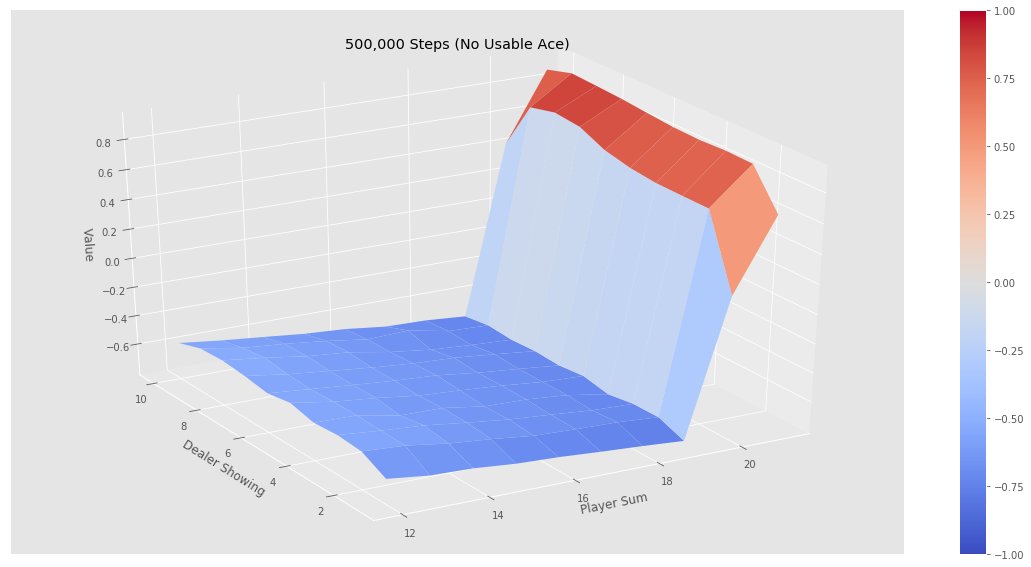

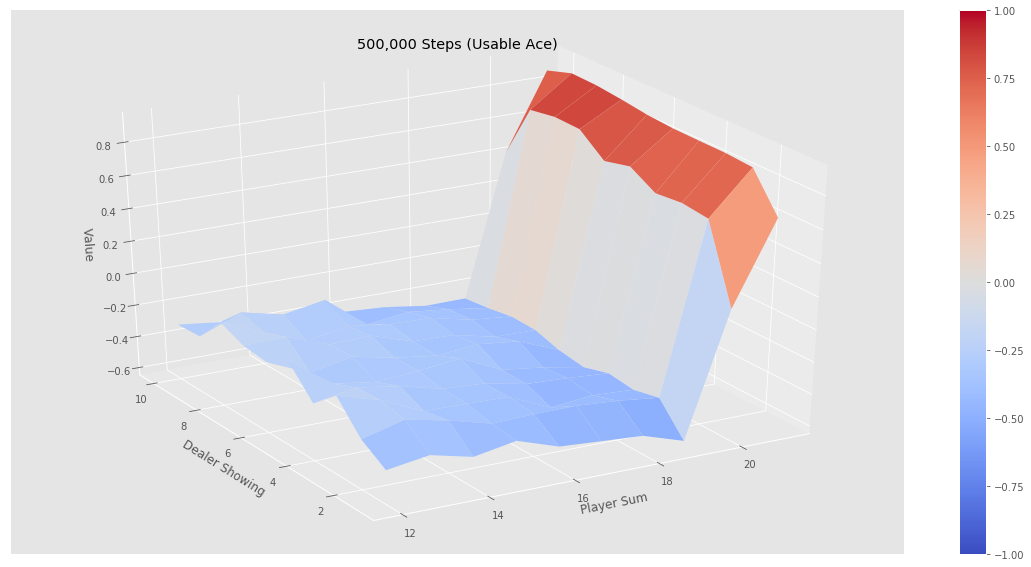

In [54]:
V_10k = mc_prediction(sample_policy, env, num_episodes=10000)
plotting.plot_value_function(V_10k, title="10,000 Steps")

V_500k = mc_prediction(sample_policy, env, num_episodes=500000)
plotting.plot_value_function(V_500k, title="500,000 Steps")